# Multiple Linear Regression Model

In [47]:
#import all the libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from warnings import filterwarnings
filterwarnings('ignore')

In [48]:
#load in train, label and test files. Label file contains total_cases
train = pd.read_csv('DengueProject/dengue_features_train.csv', parse_dates=[3])
labels = pd.read_csv('DengueProject/dengue_labels_train.csv')
test = pd.read_csv('DengueProject/dengue_features_test.csv', parse_dates=[3])



In [49]:
#fill in Na using front fill as suggested by DrivenData
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)

train['month']= train.week_start_date.dt.month
test['month']= test.week_start_date.dt.month

In [50]:
#put the total cases label in the main dataframe
train = pd.merge(train, labels, on=['city', 'year', 'weekofyear'])

In [51]:
train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'month', 'total_cases'],
      dtype='object')

In [52]:
train.fillna(method='bfill', inplace=True)

test.fillna(method='bfill', inplace=True)

#split the data into two data frames sj and iq
sj = train[train['city']=='sj']
iq = train[train['city']=='iq']

sj_test=test[test['city']=='sj']
iq_test=test[test['city']=='iq']




In [53]:
from sklearn.linear_model import LinearRegression
#get the varoiable for sj we want

sj1 = sj.columns[3:-2]



sj2 = sj[sj1]
sj2 = sj2.set_index('week_start_date')

#get the monthly trend of sj dengue

sj_monthly_lr = LinearRegression()
X2 = pd.get_dummies(sj['month'], prefix='month')
sj_monthly_lr.fit(X2, sj['total_cases'])

#totals cases minus monthly trend equals outliers ! AKA residuals
sjpre = pd.Series(sj_monthly_lr.predict(X2))
residuals = sj['total_cases']- sjpre


df_scores = pd.DataFrame()
for i in range (2, 53): #from the second week to the week after a year passes
    df = sj2
    df = df.rolling(i, min_periods=1).mean() # looking at differnt rolling means of variable and their corrolations w
    df['resid'] = residuals.values           #with the outlier values.
    df_corr = df.corr()
    df_scores[str(i)] = df_corr['resid']



In [54]:
feature = []
abs_corr = []
window = []

for i in df_scores.T.drop('resid', axis = 1).columns:
    feature.append(i)
    abs_corr.append(max(abs(df_scores.T[i])))
    window.append(df_scores.T[abs(df_scores.T[i]) == max(abs(df_scores.T[i]))].index[0])

scores_df = pd.DataFrame([feature, abs_corr, window]).T
scores_df.columns = ('feature', 'correlation', 'window')
scores_df.sort_values('correlation', ascending = False)

,feature,correlation,window
12,reanalysis_sat_precip_amt_mm,0.368692,52
4,precipitation_amt_mm,0.368692,52
19,station_precip_mm,0.300309,52
2,ndvi_se,0.271463,8
16,station_diur_temp_rng_c,0.232106,52
17,station_max_temp_c,0.220479,50
15,station_avg_temp_c,0.205248,52
14,reanalysis_tdtr_k,0.162691,52
0,ndvi_ne,0.150198,52
18,station_min_temp_c,0.141007,50


In [55]:
iq1 = iq.columns[3:-2]

iq2 = iq[iq1]
iq2 = iq2.set_index('week_start_date')


iq_monthly_lr = LinearRegression()
X3 = pd.get_dummies(iq['month'], prefix='month')
iq_monthly_lr.fit(X3, iq['total_cases'])
iqpre = iq_monthly_lr.predict(X3)
y3 = iq['total_cases']
res = y3 - iqpre



df_scores1 = pd.DataFrame()
for i in range (2, 53):
    df = iq2
    df = df.rolling(i, min_periods=1).mean()
    df['resid'] = res.values
    df_corr = df.corr()
    df_scores1[str(i)] = df_corr['resid']

In [56]:
feature = []
abs_corr = []
window = []

for i in df_scores1.T.drop('resid', axis = 1).columns:
    feature.append(i)
    abs_corr.append(max(abs(df_scores1.T[i])))
    window.append(df_scores1.T[abs(df_scores1.T[i]) == max(abs(df_scores1.T[i]))].index[0])

scores_df = pd.DataFrame([feature, abs_corr, window]).T
scores_df.columns = ('feature', 'correlation', 'window')
scores_df.sort_values('correlation', ascending = False)

,feature,correlation,window
2,ndvi_se,0.319828,51
8,reanalysis_max_air_temp_k,0.282089,52
14,reanalysis_tdtr_k,0.278463,52
16,station_diur_temp_rng_c,0.275939,52
11,reanalysis_relative_humidity_percent,0.267491,52
7,reanalysis_dew_point_temp_k,0.26096,52
13,reanalysis_specific_humidity_g_per_kg,0.257242,52
9,reanalysis_min_air_temp_k,0.219533,52
10,reanalysis_precip_amt_kg_per_m2,0.206724,52
17,station_max_temp_c,0.192277,40


In [57]:
df_scores = pd.DataFrame()
for i in range (2, 53):
    df = sj2
    df = df.rolling(i, min_periods=1).std()
    df['resid'] = residuals.values
    df_corr = df.corr()
    df_scores[str(i)] = df_corr['resid']


In [58]:
# create df of max absolute value of corr and the window
feature = []
abs_corr = []
window = []

for i in df_scores.T.drop('resid', axis = 1).columns:
    feature.append(i)
    abs_corr.append(max(abs(df_scores.T[i])))
    window.append(df_scores.T[abs(df_scores.T[i]) == max(abs(df_scores.T[i]))].index[0])

scores_df = pd.DataFrame([feature, abs_corr, window]).T
scores_df.columns = ('feature', 'correlation', 'window')
scores_df.sort_values('correlation', ascending = False)

,feature,correlation,window
4,precipitation_amt_mm,0.332589,52
12,reanalysis_sat_precip_amt_mm,0.332589,52
13,reanalysis_specific_humidity_g_per_kg,0.247661,49
19,station_precip_mm,0.241734,52
7,reanalysis_dew_point_temp_k,0.239075,49
1,ndvi_nw,0.23391,6
5,reanalysis_air_temp_k,0.226307,52
14,reanalysis_tdtr_k,0.215831,52
6,reanalysis_avg_temp_k,0.215287,52
9,reanalysis_min_air_temp_k,0.207676,52


In [59]:
df_scores1 = pd.DataFrame()
for i in range (2, 53):
    df = iq2
    df = df.rolling(i, min_periods=1).std()
    df['resid'] = res.values
    df_corr = df.corr()
    df_scores1[str(i)] = df_corr['resid']

In [60]:
feature = []
abs_corr = []
window = []

for i in df_scores1.T.drop('resid', axis = 1).columns:
    feature.append(i)
    abs_corr.append(max(abs(df_scores1.T[i])))
    window.append(df_scores1.T[abs(df_scores1.T[i]) == max(abs(df_scores1.T[i]))].index[0])

scores_df = pd.DataFrame([feature, abs_corr, window]).T
scores_df.columns = ('feature', 'correlation', 'window')
scores_df.sort_values('correlation', ascending = False)

,feature,correlation,window
16,station_diur_temp_rng_c,0.317374,20
19,station_precip_mm,0.297807,32
17,station_max_temp_c,0.266508,19
4,precipitation_amt_mm,0.231317,52
12,reanalysis_sat_precip_amt_mm,0.231317,52
5,reanalysis_air_temp_k,0.217474,40
2,ndvi_se,0.202198,10
11,reanalysis_relative_humidity_percent,0.197855,41
14,reanalysis_tdtr_k,0.18506,5
6,reanalysis_avg_temp_k,0.179258,40


In [61]:
df_scores = pd.DataFrame()
for i in range (2, 53):
    df = sj2
    df = df.shift(i)
    df['resid'] = residuals.values
    df_corr = df.corr()
    df_scores[str(i)] = df_corr['resid']

In [62]:
feature = []
abs_corr = []
window = []

for i in df_scores.T.drop('resid', axis = 1).columns:
    feature.append(i)
    abs_corr.append(max(abs(df_scores.T[i])))
    window.append(df_scores.T[abs(df_scores.T[i]) == max(abs(df_scores.T[i]))].index[0])

scores_df = pd.DataFrame([feature, abs_corr, window]).T
scores_df.columns = ('feature', 'correlation', 'window')
scores_df.sort_values('correlation', ascending = False)

,feature,correlation,window
0,ndvi_ne,0.176889,36
16,station_diur_temp_rng_c,0.160064,32
2,ndvi_se,0.151656,2
14,reanalysis_tdtr_k,0.111653,51
1,ndvi_nw,0.107425,39
17,station_max_temp_c,0.0955982,5
4,precipitation_amt_mm,0.0827118,25
12,reanalysis_sat_precip_amt_mm,0.0827118,25
19,station_precip_mm,0.0823137,48
18,station_min_temp_c,0.0636753,10


In [63]:
df_scores1 = pd.DataFrame()
for i in range (2, 53):
    df = iq2
    df = df.shift(i)
    df['resid'] = res.values
    df_corr = df.corr()
    df_scores1[str(i)] = df_corr['resid']

In [64]:
feature = []
abs_corr = []
window = []

for i in df_scores1.T.drop('resid', axis = 1).columns:
    feature.append(i)
    abs_corr.append(max(abs(df_scores1.T[i])))
    window.append(df_scores1.T[abs(df_scores1.T[i]) == max(abs(df_scores1.T[i]))].index[0])

scores_df = pd.DataFrame([feature, abs_corr, window]).T
scores_df.columns = ('feature', 'abs_corr', 'window')
scores_df.sort_values('abs_corr', ascending = False)

,feature,abs_corr,window
16,station_diur_temp_rng_c,0.198551,15
17,station_max_temp_c,0.191192,16
10,reanalysis_precip_amt_kg_per_m2,0.157559,52
14,reanalysis_tdtr_k,0.149534,49
19,station_precip_mm,0.148919,29
11,reanalysis_relative_humidity_percent,0.144006,12
13,reanalysis_specific_humidity_g_per_kg,0.136251,12
7,reanalysis_dew_point_temp_k,0.135961,12
15,station_avg_temp_c,0.135051,23
3,ndvi_sw,0.133867,52


In [65]:

train['sjmean1'] = train['ndvi_se'].rolling(window=8).mean()
train['sjmean2'] = train['station_max_temp_c'].rolling(window=50).mean()
train['sjmean3'] = train['reanalysis_sat_precip_amt_mm'].rolling(window=52).mean()
train['sjmean4'] = train['precipitation_amt_mm'].rolling(window=52).mean()
train['sjmean5'] = train['station_precip_mm'].rolling(window=52).mean()
train['sjmean6'] = train['precipitation_amt_mm'].rolling(window=52).mean()
train['sjmean7'] = train['station_diur_temp_rng_c'].rolling(window=52).mean()
train['sjmean8'] = train['station_avg_temp_c'].rolling(window=52).mean()
train['sjmean9'] = train['reanalysis_tdtr_k'].rolling(window=52).mean()
train['sjmean10'] = train['ndvi_ne'].rolling(window=52).mean()

test['sjmean1'] = test['ndvi_se'].rolling(window=8).mean()
test['sjmean2'] = test['station_max_temp_c'].rolling(window=50).mean()
test['sjmean3'] = test['reanalysis_sat_precip_amt_mm'].rolling(window=52).mean()
test['sjmean4'] = test['precipitation_amt_mm'].rolling(window=52).mean()
test['sjmean5'] = test['station_precip_mm'].rolling(window=52).mean()
test['sjmean6'] = test['precipitation_amt_mm'].rolling(window=52).mean()
test['sjmean7'] = test['station_diur_temp_rng_c'].rolling(window=52).mean()
test['sjmean8'] = test['station_avg_temp_c'].rolling(window=52).mean()
test['sjmean9'] = test['reanalysis_tdtr_k'].rolling(window=52).mean()
test['sjmean10'] = test['ndvi_ne'].rolling(window=52).mean()



train['sjstd1'] = train['precipitation_amt_mm'].rolling(window=52).std()
train['sjstd2'] = train['reanalysis_sat_precip_amt_mm'].rolling(window=52).std()
train['sjstd3'] = train['reanalysis_specific_humidity_g_per_kg'].rolling(window=49).std()
train['sjstd4'] = train['station_precip_mm'].rolling(window=52).std()
train['sjstd5'] = train['reanalysis_dew_point_temp_k'].rolling(window=49).std()
train['sjstd6'] = train['ndvi_nw'].rolling(window=6).std()
train['sjstd7'] = train['reanalysis_air_temp_k'].rolling(window=52).std()
train['sjstd8'] = train['reanalysis_tdtr_k'].rolling(window=52).std()
train['sjstd9'] = train['reanalysis_avg_temp_k'].rolling(window=52).std()
train['sjstd10'] = train['reanalysis_min_air_temp_k'].rolling(window=52).std()
train['sjstd11'] = train['ndvi_ne'].rolling(window=28).std()
train['sjstd12'] = train['ndvi_sw'].rolling(window=5).std()
train['sjstd13'] = train['reanalysis_relative_humidity_percent'].rolling(window=48).std()
train['sjstd14'] = train['ndvi_se'].rolling(window=3).std()
train['sjstd15'] = train['reanalysis_max_air_temp_k'].rolling(window=52).std()

test['sjstd1'] = test['precipitation_amt_mm'].rolling(window=52).std()
test['sjstd2'] = test['reanalysis_sat_precip_amt_mm'].rolling(window=52).std()
test['sjstd3'] = test['reanalysis_specific_humidity_g_per_kg'].rolling(window=49).std()
test['sjstd4'] = test['station_precip_mm'].rolling(window=52).std()
test['sjstd5'] = test['reanalysis_dew_point_temp_k'].rolling(window=49).std()
test['sjstd6'] = test['ndvi_nw'].rolling(window=6).std()
test['sjstd7'] = test['reanalysis_air_temp_k'].rolling(window=52).std()
test['sjstd8'] = test['reanalysis_tdtr_k'].rolling(window=52).std()
test['sjstd9'] = test['reanalysis_avg_temp_k'].rolling(window=52).std()
test['sjstd10'] = test['reanalysis_min_air_temp_k'].rolling(window=52).std()
test['sjstd11'] = test['ndvi_ne'].rolling(window=28).std()
test['sjstd12'] = test['ndvi_sw'].rolling(window=5).std()
test['sjstd13'] = test['reanalysis_relative_humidity_percent'].rolling(window=48).std()
test['sjstd14'] = test['ndvi_se'].rolling(window=3).std()
test['sjstd15'] = test['reanalysis_max_air_temp_k'].rolling(window=52).std()

train['sjshift1'] = train['ndvi_ne'].shift(36)
train['sjshift2'] = train['ndvi_nw'].shift(39)
train['sjshift3'] = train['ndvi_se'].shift(2)

test['sjshift1'] = test['ndvi_ne'].shift(36)
test['sjshift2'] = test['ndvi_nw'].shift(32)
test['sjshift3'] = test['ndvi_se'].shift(2)



#test['rolling_mean_reanalysis_relative_humidity_percent'] = pd.rolling_mean(train['reanalysis_relative_humidity_percent'], 8) 

features=[
'sjmean6',
'sjmean7',
'sjmean8',
'sjmean9',
'sjstd1',
'sjstd5','sjstd6',
'sjstd7','sjstd8','sjstd9',
'sjstd12','sjstd13','sjstd14', 
'sjshift1', 'sjshift2','sjshift3',
'reanalysis_max_air_temp_k','station_max_temp_c','reanalysis_min_air_temp_k',
'reanalysis_air_temp_k','station_min_temp_c']




Feature Selection: we used different features for both SJ and IQ depending on the correlations explain earlier and in the EDA.
After some playing aorund with runnning the model, some features were left out as they skewed the model too much one way or another.

In [66]:



train['shiftyiq1']= train['station_diur_temp_rng_c'].shift(15)
train['shiftyiq2']= train['station_max_temp_c'].shift(16)
train['shiftyiq3']= train['reanalysis_precip_amt_kg_per_m2'].shift(52)
train['shiftyiq4']= train['station_precip_mm'].shift(29)
train['shiftyiq5']= train['reanalysis_tdtr_k'].shift(49)


test['shiftyiq1']= test['station_diur_temp_rng_c'].shift(15)
test['shiftyiq2']= test['station_max_temp_c'].shift(16)
test['shiftyiq3']= test['reanalysis_precip_amt_kg_per_m2'].shift(52)
test['shiftyiq4']= test['station_precip_mm'].shift(29)
test['shiftyiq5']= test['reanalysis_tdtr_k'].shift(49)



train['iqmeans1'] = train['ndvi_se'].rolling(window = 51).mean()
train['iqmeans2'] = train['reanalysis_max_air_temp_k'].rolling(window = 52).mean()
train['iqmeans3'] = train['reanalysis_tdtr_k'].rolling(window = 52).mean()
train['iqmeans4'] = train['station_diur_temp_rng_c'].rolling(window = 52).mean()
train['iqmeans5'] = train['reanalysis_relative_humidity_percent'].rolling(window = 52).mean()
train['iqmeans6'] = train['reanalysis_dew_point_temp_k'].rolling(window = 52).mean()
train['iqmeans7'] = train['reanalysis_specific_humidity_g_per_kg'].rolling(window = 52).mean()
train['iqmeans8'] = train['reanalysis_min_air_temp_k'].rolling(window = 52).mean()
train['iqmeans9'] = train['reanalysis_precip_amt_kg_per_m2'].rolling(window = 52).mean()
train['iqmeans10'] = train['station_max_temp_c'].rolling(window = 40).mean()
train['iqmeans11'] = train['ndvi_nw'].rolling(window = 52).mean()
train['iqmeans12'] = train['precipitation_amt_mm'].rolling(window = 52).mean()
train['iqmeans13'] = train['reanalysis_sat_precip_amt_mm'].rolling(window = 5).mean()


test['iqmeans1'] = test['ndvi_se'].rolling(window = 51).mean()
test['iqmeans2'] = test['reanalysis_max_air_temp_k'].rolling(window = 52).mean()
test['iqmeans3'] = test['reanalysis_tdtr_k'].rolling(window = 52).mean()
test['iqmeans4'] = test['station_diur_temp_rng_c'].rolling(window = 52).mean()
test['iqmeans5'] = test['reanalysis_relative_humidity_percent'].rolling(window = 52).mean()
test['iqmeans6'] = test['reanalysis_dew_point_temp_k'].rolling(window = 52).mean()
test['iqmeans7'] = test['reanalysis_specific_humidity_g_per_kg'].rolling(window = 52).mean()
test['iqmeans8'] = test['reanalysis_min_air_temp_k'].rolling(window = 52).mean()
test['iqmeans9'] = test['reanalysis_precip_amt_kg_per_m2'].rolling(window = 52).mean()
test['iqmeans10'] = test['station_max_temp_c'].rolling(window = 40).mean()
test['iqmeans11'] = test['ndvi_nw'].rolling(window = 52).mean()
test['iqmeans12'] = test['precipitation_amt_mm'].rolling(window = 52).mean()
test['iqmeans13'] = test['reanalysis_sat_precip_amt_mm'].rolling(window = 5).mean()



train['iqstd1'] = train['station_precip_mm'].rolling(window = 32).std()
train['iqstd2'] = train['station_max_temp_c'].rolling(window = 19).std()
train['iqstd3'] = train['precipitation_amt_mm'].rolling(window = 52).std()
train['iqstd4'] = train['reanalysis_sat_precip_amt_mm'].rolling(window = 52).std()
train['iqstd5'] = train['reanalysis_tdtr_k'].rolling(window = 5).std()
train['iqstd6'] = train['reanalysis_air_temp_k'].rolling(window = 40).std()
train['iqstd7'] = train['ndvi_sw'].rolling(window = 45).std()
train['iqstd8'] = train['ndvi_se'].rolling(window = 10).std()
train['iqstd9'] = train['station_diur_temp_rng_c'].rolling(window = 20).std()
train['iqstd10'] = train['reanalysis_relative_humidity_percent'].rolling(window = 41).std()
train['iqstd11'] = train['reanalysis_avg_temp_k'].rolling(window = 41).std()
train['iqstd12'] = train['ndvi_nw'].rolling(window = 52).std()


test['iqstd1'] = test['station_precip_mm'].rolling(window = 32).std()
test['iqstd2'] = test['station_max_temp_c'].rolling(window = 19).std()
test['iqstd3'] = test['precipitation_amt_mm'].rolling(window = 52).std()
test['iqstd4'] = test['reanalysis_sat_precip_amt_mm'].rolling(window = 52).std()
test['iqstd5'] = test['reanalysis_tdtr_k'].rolling(window = 5).std()
test['iqstd6'] = test['reanalysis_air_temp_k'].rolling(window = 40).std()
test['iqstd7'] = test['ndvi_sw'].rolling(window = 45).std()
test['iqstd8'] = test['ndvi_se'].rolling(window = 10).std()
test['iqstd9'] = test['station_diur_temp_rng_c'].rolling(window = 20).std()
test['iqstd10'] = test['reanalysis_relative_humidity_percent'].rolling(window = 41).std()
test['iqstd11'] = test['reanalysis_avg_temp_k'].rolling(window = 41).std()
test['iqstd12'] = test['ndvi_nw'].rolling(window = 52).std()







features2=[ 
'iqmeans1',
'iqmeans3',
'iqmeans5','iqmeans6',
'iqmeans8','iqmeans9',
'iqmeans11','iqmeans12','iqmeans13', 
'iqstd5','iqstd6',
'iqstd7','iqstd8',
'iqstd9',
'iqstd10',
'iqstd11', 
'shiftyiq2','shiftyiq3',
'shiftyiq4','shiftyiq5','reanalysis_specific_humidity_g_per_kg',
'reanalysis_dew_point_temp_k','reanalysis_min_air_temp_k','station_min_temp_c']




In [67]:
train.fillna(method='bfill', inplace=True)

test.fillna(method='bfill', inplace=True)
train.to_csv('FINALfeatures.csv')


sj = train[train['city']=='sj']
iq = train[train['city']=='iq']

sj_test=test[test['city']=='sj']
iq_test=test[test['city']=='iq']




In [68]:
from sklearn import model_selection
from sklearn import linear_model


In [69]:
#test fit model on the last ~20% of the data
sj_train = sj.head(800)# train
sj_Xtest = sj.tail(sj.shape[0] - 800) #set for validation

iq_train = iq.head(400)# train
iq_Xtest = iq.tail(iq.shape[0] - 400)#set for validation

sj_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,iqstd3,iqstd4,iqstd5,iqstd6,iqstd7,iqstd8,iqstd9,iqstd10,iqstd11,iqstd12
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,39.057351,39.057351,0.287601,1.001113,0.058229,0.044625,0.743774,4.150655,0.993495,0.080291
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,39.057351,39.057351,0.287601,1.001113,0.058229,0.044625,0.743774,4.150655,0.993495,0.080291
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,39.057351,39.057351,0.287601,1.001113,0.058229,0.044625,0.743774,4.150655,0.993495,0.080291
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,39.057351,39.057351,0.287601,1.001113,0.058229,0.044625,0.743774,4.150655,0.993495,0.080291
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,39.057351,39.057351,0.287601,1.001113,0.058229,0.044625,0.743774,4.150655,0.993495,0.080291


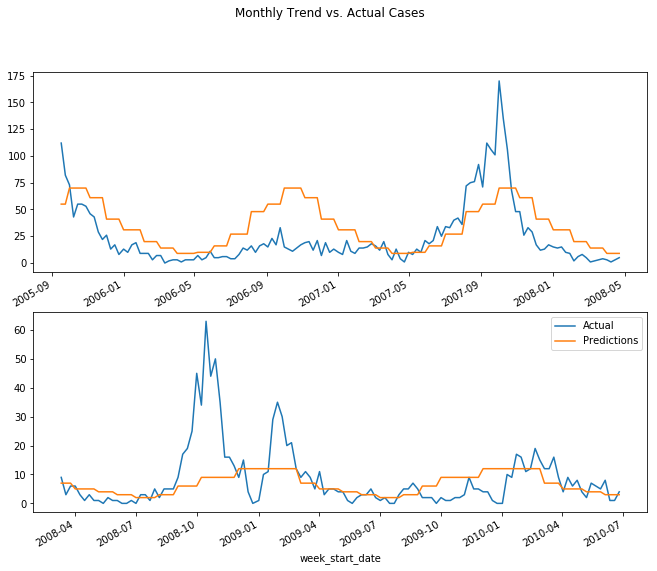

In [93]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


sj_monthly_lr = LinearRegression()
X2 = pd.get_dummies(sj['month'], prefix='month')
monthpre = sj_monthly_lr.fit(X2, sj['total_cases'])
residualsOverAll = sj['total_cases'] - monthpre.predict(X2).astype(int)

iq_monthly_lr = LinearRegression()
X3 = pd.get_dummies(iq['month'], prefix='month')
monthpreIQ = iq_monthly_lr.fit(X3, iq['total_cases'])
residualsOverAll1 = iq['total_cases'] - monthpreIQ.predict(X3).astype(int) 



Xvalid = pd.get_dummies(sj_Xtest['month'], prefix='month')
monthpreds = monthpre.predict(Xvalid).astype(int)
total_cases = sj['total_cases']
totals1 = total_cases[800:] 
residualSJ = (totals1-monthpreds).astype(int)

Xvalid1 = pd.get_dummies(iq_Xtest['month'], prefix='month')
monthpreds1 = monthpreIQ.predict(Xvalid1).astype(int)
total_cases1 = iq['total_cases']
totals2 = total_cases1[400:] 
residualIQ = (totals2-monthpreds1).astype(int)

sj_Xtest['monthlies'] = monthpreds
sj_Xtest['resis'] = residualSJ
sj_Xtest.index = sj_Xtest['week_start_date']


iq_Xtest['monthlies'] = monthpreds1
iq_Xtest['resis'] = residualIQ
iq_Xtest.index = iq_Xtest['week_start_date']

figs, axes = plt.subplots(nrows=2, ncols=1, figsize=(11, 9))
sj_Xtest.total_cases.plot(ax=axes[0], label="Actual")
sj_Xtest.monthlies.plot(ax=axes[0], label="Predictions")
#sj_Xtest.resis.plot(ax=axes[0], label="residual")

iq_Xtest.total_cases.plot(ax=axes[1], label="Actual")
iq_Xtest.monthlies.plot(ax=axes[1], label="Predictions")
#iq_Xtest.resis.plot(ax=axes[1], label="residuals")

plt.suptitle("Monthly Trend vs. Actual Cases")
plt.legend()



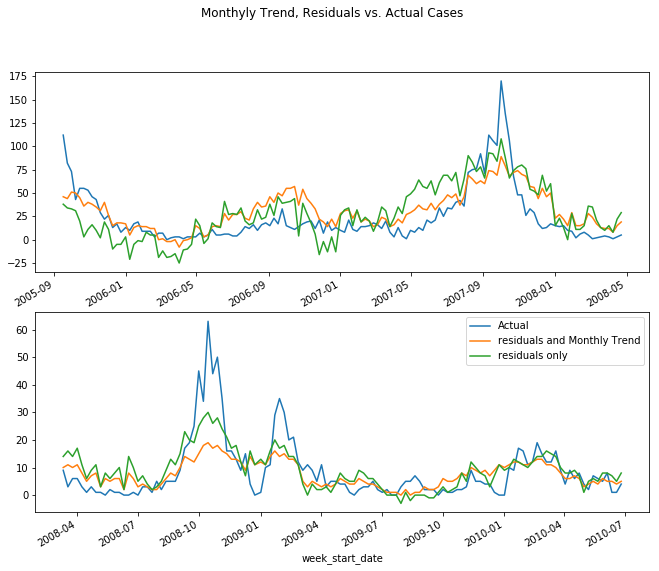

In [103]:
lr_sj_residual = LinearRegression()
lr_sj_residual.fit(sj[features], sj['total_cases'])


lr_iq_residual = LinearRegression()
lr_iq_residual.fit(iq[features2], iq['total_cases'])



sj_valid_preds = lr_sj_residual.predict(sj_Xtest[features]).astype(int)
iq_valid_preds = lr_iq_residual.predict(iq_Xtest[features2]).astype(int)




sj_Xtest['rezzies'] = sj_valid_preds
iq_Xtest['rezzies'] = iq_valid_preds

sj_cases_pred = (sj_valid_preds + monthpreds)/2
sj_cases_pred = sj_cases_pred.astype(int)

iq_cases_pred = (iq_valid_preds + monthpreds1)/2
iq_cases_pred = iq_cases_pred.astype(int)


sj_Xtest['full'] = sj_cases_pred
iq_Xtest['full'] = iq_cases_pred


figs, axes = plt.subplots(nrows=2, ncols=1, figsize=(11, 9))
sj_Xtest.total_cases.plot(ax=axes[0], label="Actual")
sj_Xtest.full.plot(ax=axes[0], label="residuals and Monthly Tred")
sj_Xtest.rezzies.plot(ax=axes[0], label="residuals only")

iq_Xtest.total_cases.plot(ax=axes[1], label="Actual")
iq_Xtest.full.plot(ax=axes[1], label="residuals and Monthly Trend")
iq_Xtest.rezzies.plot(ax=axes[1], label="residuals only")


plt.suptitle("Monthyly Trend, Residuals vs. Actual Cases")
plt.legend()

In [99]:
Sjtest = pd.get_dummies(sj_test['month'], prefix='month')
Iqtest = pd.get_dummies(iq_test['month'], prefix='month')
monthpredfinal = sj_monthly_lr.predict(Sjtest).astype(int)
monthpredfinal1 = iq_monthly_lr.predict(Iqtest).astype(int)
sj_residual_final = lr_sj_residual.predict(sj_test[features]).astype(int)
iq_residual_final = lr_iq_residual.predict(iq_test[features2]).astype(int)
sj_combined = (monthpredfinal+sj_residual_final)/2
iq_combined = (monthpredfinal1+iq_residual_final)/2



submission = pd.read_csv("DengueProject/submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sj_combined, iq_combined])
#add a total cases column to the test df
submission['total_cases'] = submission['total_cases'].astype(int)
submission.to_csv("MLR46.csv")

In [172]:
# Record the preictions as totals cases in a separate test file for future use
test=test.join(train.groupby(['city','weekofyear'])['total_cases'].mean(), on=['city','weekofyear'], rsuffix='_avg2')


test['total_cases'] =  np.concatenate([sj_combined, iq_combined])

test['total_cases']= test['total_cases']+test['total_cases_avg2']
test['random']=np.random.uniform(low=0.8, high=1.5, size=len(test))
#add some randomness
test['total_cases']=test['total_cases_avg2']*test['random']
#save file
test.to_csv("LRpredictions.csv")

dude = pd.read_csv("LRpredictions.csv")
#dude.head()

In [173]:
dude.head()

,Unnamed: 0,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,iqstd6,iqstd7,iqstd8,iqstd9,iqstd10,iqstd11,iqstd12,total_cases,total_cases_avg2,random
0,0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,...,1.070433,0.058378,0.030843,0.776897,2.687877,1.084715,0.120641,14.662567,10.722222,1.367493
1,1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,...,1.070433,0.058378,0.030843,0.776897,2.687877,1.084715,0.120641,9.128497,9.944444,0.917949
2,2,sj,2008,20,2008-05-13,-0.0015,-0.012400,0.151083,0.091529,3.66,...,1.070433,0.058378,0.030843,0.776897,2.687877,1.084715,0.120641,14.885271,11.500000,1.294371
3,3,sj,2008,21,2008-05-20,-0.0015,-0.019867,0.124329,0.125686,0.00,...,1.070433,0.058378,0.030843,0.776897,2.687877,1.084715,0.120641,11.132102,11.166667,0.996905
4,4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,...,1.070433,0.058378,0.030843,0.776897,2.687877,1.084715,0.120641,20.289223,13.777778,1.472605
